In [31]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 
import matplotlib.cm as cm
cmap = plt.cm.tab20  # define the colormap
cmap = [cmap(i) for i in range(20)]

In [68]:
model = AbstractModel()
model.N =Param ( mutable=True)
model.i = RangeSet(1,model.N)
model.j = Set(initialize=model.i)

def rule_init(model,i):
    return random.uniform(0,1)

model.xp =Param (model.i, default=rule_init, mutable=True) 
model.yp =Param (model.i, default=rule_init, mutable=True)

model.k  =Param  (mutable=True)
model.x = Var(model.i,model.j,initialize=0, bounds=(0,1.1),within=NonNegativeReals)
model.y = Var(model.j, initialize=1,within=Binary)

model.z = Var(bounds=(0,model.N), within=NonNegativeReals)

def rule_eq2(model,i):
    return sum(model.x[i,j] for j in model.j) >=1
model.eq2 = Constraint(model.i,rule=rule_eq2)


def rule_eq3(model):
    return sum(model.y[j] for j in model.j ) <=model.k
model.eq3 = Constraint(model.j,rule=rule_eq3)

def rule_eq4(model,i,j):
    return model.x[i,j]<= model.y[j]
model.eq4 = Constraint(model.i,model.j,rule=rule_eq4)


def rule_eq5(model):
    return sum(sqrt((model.xp[i]-model.xp[j])**2+(model.yp[i]-model.yp[j])**2)*model.x[i,j] for i in model.i for j in model.j if i!=j) <= model.z
model.eq5 = Constraint(rule=rule_eq5)
 
model.obj = Objective(expr=model.z, sense=minimize)

In [73]:
model.N=300
model.k=15
opt = SolverFactory('glpk')
opt = SolverFactory('gurobi')
#opt.options["mipgap"] = 0.01
instance = model.create_instance()
#instance.u[1].fix(0)
results = opt.solve(instance) # solves and updates instance
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  results.solver.status)
print(value(instance.obj) )

feasible
27.194728513378077


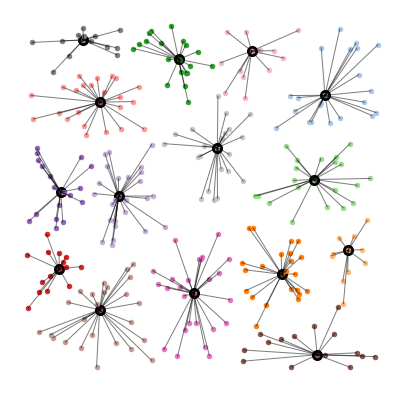

In [76]:
fig = plt.figure(figsize=(7,7))
for i in instance.i:
    for j in instance.j:
        if value(instance.x[i,j])>0.1:
            plt.plot([value(instance.xp[i]),value(instance.xp[j])],[value(instance.yp[i]),value(instance.yp[j])],lw=1,c='k', alpha=0.5)
plt.grid()
k=0
for j in instance.j:
    if value(instance.y[j])>0.9:
        k+=1
        plt.scatter(value(instance.xp[j]),value(instance.yp[j]),s=100,c='k',marker='o')
        for i in instance.i:
            if value(instance.x[i,j])>0.1:
                plt.scatter(value(instance.xp[i]),value(instance.yp[i]),s=20,color=cmap[k],marker='o',alpha=1)     
plt.axis('off')
plt.savefig("single-TSP.png")

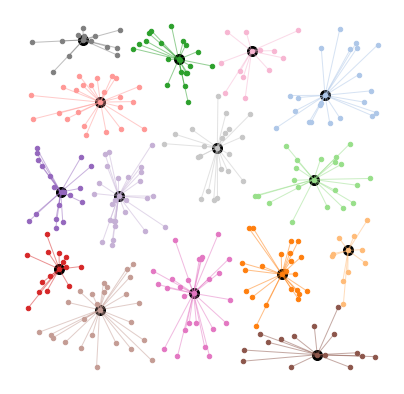

In [77]:
fig = plt.figure(figsize=(7,7))
k=0
for j in instance.j:
    if value(instance.y[j])>0.1:
        k+=1
        for i in instance.i:
            if value(instance.x[i,j])>0.1:
                plt.plot([value(instance.xp[i]),value(instance.xp[j])],[value(instance.yp[i]),value(instance.yp[j])],lw=1,color=cmap[k], alpha=0.5)
plt.grid()
k=0
for j in instance.j:
    if value(instance.y[j])>0.1:
        k+=1
        plt.scatter(value(instance.xp[j]),value(instance.yp[j]),s=100,c='k',marker='o')
        for i in instance.i:
            if value(instance.x[i,j])>0.1:
                plt.scatter(value(instance.xp[i]),value(instance.yp[i]),s=20,color=cmap[k],marker='o',alpha=1)     
plt.axis('off')
plt.savefig("single-TSP.png")

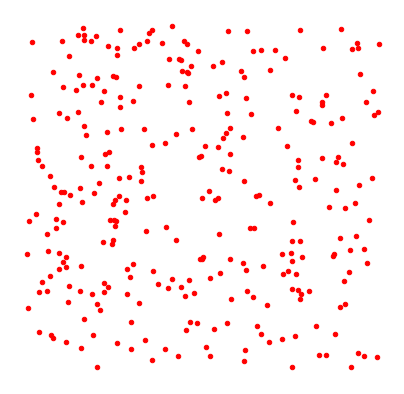

In [78]:
fig = plt.figure(figsize=(7,7))
for j in instance.j:
    if value(instance.y[j])>0.1:
        for i in instance.i:
            if value(instance.x[i,j])>0.1:
                plt.scatter(value(instance.xp[i]),value(instance.yp[i]),s=20,color='r',marker='o',alpha=1)
plt.axis('off')
plt.savefig("singleA-TSP.png")

In [55]:
locations=set()
for i in instance.i:
    for j in instance.j:
        if value(instance.x[i,j])>0.01:
            locations.add(j)
print(locations)

{64, 128, 104, 13, 78, 79, 51, 54, 151, 28}


In [67]:
for j in instance.j:
    if value(instance.y[j])>0.01:
        print(value(instance.y[j]))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
